## Import relevant libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load data

In [2]:
raw_data = pd.read_csv('energydata_complete.csv')
raw_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
raw_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Dealing with missing values

In [7]:
raw_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

### First normalise our dataset to a common scale using the min max scaler

In [20]:
cleaned_df = raw_data.drop(['date', 'lights'], axis=1)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(cleaned_df), columns=cleaned_df.columns)

In [26]:
features_df = normalized_data.drop(columns=['Appliances'])
appliances_target = normalized_data['Appliances']

### Split the dataset into training and testing dataset.

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, appliances_target, test_size=0.3, random_state=42)

## Regression

In [34]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [53]:
y_hat = reg.predict(x_train)
y_hat

array([0.03737559, 0.08442607, 0.02815737, ..., 0.0462295 , 0.08711054,
       0.07302775])

In [67]:
reg.coef_

array([-3.28105119e-03,  5.53534515e-01, -2.36185732e-01, -4.56706338e-01,
        2.90633857e-01,  9.60509642e-02,  2.89775584e-02,  2.63921249e-02,
       -1.56549067e-02,  1.60127904e-02,  2.36429567e-01,  3.80481870e-02,
        1.03169111e-02, -4.46131775e-02,  1.01992235e-01, -1.57596846e-01,
       -1.89936752e-01, -3.98020547e-02, -3.21863242e-01,  6.84052274e-03,
       -7.76708241e-02,  2.91830956e-02,  1.23055262e-02,  1.17760742e-01,
       -2.75960282e+10,  2.75960282e+10])

In [68]:
reg.intercept_

0.15288462305884704

## Checking the OLS assumptions

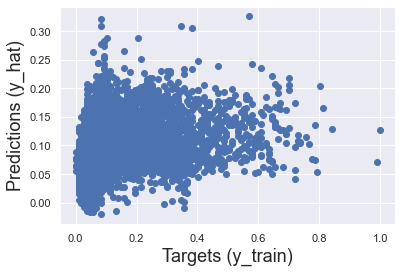

In [43]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

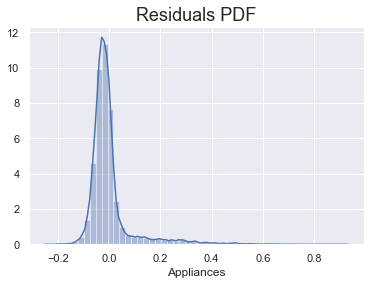

In [44]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

## Mean Absolute Error

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

## R-Squared

In [80]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

### RSS

In [82]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

### RMSE

In [84]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

## Ridge Regression

In [83]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

### Ridge RMSE

In [95]:
pred_ridge_reg = ridge_reg.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_ridge_reg)).round(3))

0.089


## Feature Selection and Lasso Regression

In [97]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

### Lasso RMSE

In [99]:
pred_lasso_reg = lasso_reg.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_lasso_reg)).round(3))

0.095


## Comparing the Effects of regularisation

In [87]:
def get_weights_df(reg, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(reg.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(reg, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights.round(4)

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,rv1,-2.759603e+10,0.0007,-0.0000
1,RH_2,-4.567000e-01,-0.4111,-0.0000
2,T_out,-3.219000e-01,-0.2622,0.0000
3,T2,-2.362000e-01,-0.2014,0.0000
4,T9,-1.899000e-01,-0.1889,-0.0000
5,RH_8,-1.576000e-01,-0.1568,-0.0001
6,RH_out,-7.770000e-02,-0.0547,-0.0496
7,RH_7,-4.460000e-02,-0.0460,-0.0000
8,RH_9,-3.980000e-02,-0.0414,-0.0000
9,T5,-1.570000e-02,-0.0199,-0.0000
